In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("moa_analytics.csv")

In [3]:
df.head()

device session_date  apple_flag              entry_time  \
0  device:00:ee:bd:c2:2a:2b    11/8/2015           0  2015-11-08 12:17:15.25   
1  device:00:ee:bd:c2:2c:93    3/26/2016           0  2016-03-26 14:13:24.45   
2  device:00:ee:bd:c2:2e:ba   11/21/2015           0  2015-11-21 14:17:56.76   
3  device:00:ee:bd:c2:37:17   11/21/2015           0  2015-11-21 20:35:30.40   
4  device:00:ee:bd:c2:37:17    3/21/2016           0  2016-03-21 17:49:45.72   

                exit_time  duration  avg_time_session_update  distinct_ap  \
0  2015-11-08 12:23:53.57     398.0                    199.0            1   
1  2016-03-26 18:57:53.54   17069.0                    107.0           75   
2  2015-11-21 17:06:16.50   10100.0                    124.0           33   
3  2015-11-22 00:22:01.44   13591.0                    109.0           29   
4  2016-03-21 17:57:55.42     490.0                    122.0            3   

   distinct_sessions  total_updates            ...             \
0                  1              3            ...              
1                 35            160            ...              
2                  7             82            ...              
3                 13            125            ...              
4                  2              5            ...              

   session_updates_3_S  session_updates_3_SE  session_updates_3_SW  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   session_updates_3_W  session_updates_4_E  session_updates_4_NE  \
0                    3                    0                     0   
1                    0                    0                     0   
2                    9                    0                     0   
3                    0                   80                    20   
4                    0                    0                     0   

   session_updates_4_S  session_updates_4_SE  session_updates_outside  \
0                    0                     0                        0   
1                    0                     0                        0   
2                    0                     0                        3   
3                    0                     2                        6   
4                    0                     0                        1   

   session_updates_entrance  
0                         3  
1                        16  
2                         8  
3                        30  
4                         4  

[5 rows x 108 columns]

In [66]:
df.describe()

apple_flag      duration  avg_time_session_update   distinct_ap  \
count  12614.000000  12614.000000             12614.000000  12614.000000   
mean       0.585778  12322.568733               445.990883     26.256620   
std        0.492607  14398.098671               949.130619     31.583172   
min        0.000000      6.000000                 3.000000      1.000000   
25%        0.000000   2260.250000               117.000000      3.250000   
50%        1.000000   7623.000000               221.000000     14.000000   
75%        1.000000  17683.000000               380.000000     38.000000   
max        1.000000  86372.000000             18913.000000    316.000000   

       distinct_sessions  total_updates  time_per_distinct_ap  \
count       12614.000000   12614.000000          12614.000000   
mean            6.920961      61.177818           1577.940939   
std             8.173388      73.398992           6354.633361   
min             1.000000       2.000000              6.000000   
25%             2.000000       8.000000            210.000000   
50%             4.000000      35.000000            377.000000   
75%             9.000000      89.000000            908.000000   
max           132.000000     824.000000          86372.000000   

       distinct_sections_visited  distinct_levels_visited  weekend_flag  \
count               12614.000000             12614.000000  12614.000000   
mean                    7.649834                 2.563184      0.410734   
std                     6.666337                 1.198560      0.491987   
min                     1.000000                 0.000000      0.000000   
25%                     2.000000                 1.000000      0.000000   
50%                     6.000000                 3.000000      0.000000   
75%                    12.000000                 3.000000      1.000000   
max                    32.000000                 6.000000      1.000000   

                 ...             session_updates_3_S  session_updates_3_SE  \
count            ...                    12614.000000          12614.000000   
mean             ...                        4.101157              1.412637   
std              ...                       13.878672              4.908496   
min              ...                        0.000000              0.000000   
25%              ...                        0.000000              0.000000   
50%              ...                        0.000000              0.000000   
75%              ...                        3.000000              0.000000   
max              ...                      511.000000            147.000000   

       session_updates_3_SW  session_updates_3_W  session_updates_4_E  \
count          12614.000000         12614.000000         12614.000000   
mean               2.340257             1.144126             0.729665   
std                7.958116             3.193687             4.174978   
min                0.000000             0.000000             0.000000   
25%                0.000000             0.000000             0.000000   
50%                0.000000             0.000000             0.000000   
75%                1.000000             0.000000             0.000000   
max              167.000000            59.000000           189.000000   

       session_updates_4_NE  session_updates_4_S  session_updates_4_SE  \
count          12614.000000         12614.000000          12614.000000   
mean               0.302838             1.015538              0.808150   
std                4.290501             6.147252              5.598613   
min                0.000000             0.000000              0.000000   
25%                0.000000             0.000000              0.000000   
50%                0.000000             0.000000              0.000000   
75%                0.000000             0.000000              0.000000   
max              271.000000           180.000000            187.000000   

       session_updates_outside  se

In [5]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of duration                   7
avg_time_session_update    7
time_per_distinct_ap       7
time_0                     2
time_1                     2
time_2                     2
time_3                     1
time_0_E                   1
time_0_SE                  1
time_1_E                   1
time_1_SE                  1
time_2_SW                  1
time_2_W                   1
time_3_E                   1
time_outside               3
time_entrance              2
dtype: int64>

In [4]:
#Since the null rows are very less, we can drop these rows

df = df.dropna()
df.head()

device session_date  apple_flag              entry_time  \
0  device:00:ee:bd:c2:2a:2b    11/8/2015           0  2015-11-08 12:17:15.25   
1  device:00:ee:bd:c2:2c:93    3/26/2016           0  2016-03-26 14:13:24.45   
2  device:00:ee:bd:c2:2e:ba   11/21/2015           0  2015-11-21 14:17:56.76   
3  device:00:ee:bd:c2:37:17   11/21/2015           0  2015-11-21 20:35:30.40   
4  device:00:ee:bd:c2:37:17    3/21/2016           0  2016-03-21 17:49:45.72   

                exit_time  duration  avg_time_session_update  distinct_ap  \
0  2015-11-08 12:23:53.57     398.0                    199.0            1   
1  2016-03-26 18:57:53.54   17069.0                    107.0           75   
2  2015-11-21 17:06:16.50   10100.0                    124.0           33   
3  2015-11-22 00:22:01.44   13591.0                    109.0           29   
4  2016-03-21 17:57:55.42     490.0                    122.0            3   

   distinct_sessions  total_updates            ...             \
0                  1              3            ...              
1                 35            160            ...              
2                  7             82            ...              
3                 13            125            ...              
4                  2              5            ...              

   session_updates_3_S  session_updates_3_SE  session_updates_3_SW  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   session_updates_3_W  session_updates_4_E  session_updates_4_NE  \
0                    3                    0                     0   
1                    0                    0                     0   
2                    9                    0                     0   
3                    0                   80                    20   
4                    0                    0                     0   

   session_updates_4_S  session_updates_4_SE  session_updates_outside  \
0                    0                     0                        0   
1                    0                     0                        0   
2                    0                     0                        3   
3                    0                     2                        6   
4                    0                     0                        1   

   session_updates_entrance  
0                         3  
1                        16  
2                         8  
3                        30  
4                         4  

[5 rows x 108 columns]

In [7]:
df_new = df.iloc[:,5:24]
df_new.head()
df_new1 = df.iloc[:,5:24]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[df_new.columns] = scaler.fit_transform(df_new[df_new.columns])
df_new.head()

NameError: name 'df_new' is not defined

In [73]:
df_new1.head()

duration  avg_time_session_update  distinct_ap  distinct_sessions  \
0     398.0                    199.0            1                  1   
1   17069.0                    107.0           75                 35   
2   10100.0                    124.0           33                  7   
3   13591.0                    109.0           29                 13   
4     490.0                    122.0            3                  2   

   total_updates  time_per_distinct_ap  distinct_sections_visited  \
0              3                 398.0                          1   
1            160                 227.0                         16   
2             82                 306.0                         10   
3            125                 468.0                         10   
4              5                 163.0                          1   

   distinct_levels_visited  weekend_flag  day_of_week  time_northfoodcourt  \
0                        1             1            1                    0   
1                        3             1            7                    0   
2                        3             1            7                    0   
3                        5             1            7                    0   
4                        1             0            2                    0   

   time_southfoodcourt  time_southrestaurant  time_0_1  time_0   time_1  \
0                    0                     0         0     0.0      0.0   
1                    0                     0         0     0.0  15184.0   
2                    0                     0         0     0.0   7453.0   
3                    0                     0         0    15.0    225.0   
4                    0                     0         0     0.0    490.0   

   time_2  time_3  time_4  
0     0.0   398.0       0  
1  1869.0    16.0       0  
2  2424.0   223.0       0  
3   676.0   365.0   12310  
4     0.0     0.0       0

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [24]:
df["Hour"] = df["entry_time"].str[11:13]
df["Exit_Hour"] = df["exit_time"].str[11:13]

In [25]:
df_new1['entry_hr'] = df["Hour"]
df_new1['exit_hr'] = df["Exit_Hour"]

NameError: name 'df_new1' is not defined

In [6]:
df_2= df.iloc[:,[5,6,7,8,9,10,11,12,15,16,17,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62]]

In [7]:
df_back = df.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62]]
df_2.head()

duration  avg_time_session_update  distinct_ap  distinct_sessions  \
0     398.0                    199.0            1                  1   
1   17069.0                    107.0           75                 35   
2   10100.0                    124.0           33                  7   
3   13591.0                    109.0           29                 13   
4     490.0                    122.0            3                  2   

   total_updates  time_per_distinct_ap  distinct_sections_visited  \
0              3                 398.0                          1   
1            160                 227.0                         16   
2             82                 306.0                         10   
3            125                 468.0                         10   
4              5                 163.0                          1   

   distinct_levels_visited  time_northfoodcourt  time_southfoodcourt  \
0                        1                    0                    0   
1                        3                    0                    0   
2                        3                    0                    0   
3                        5                    0                    0   
4                        1                    0                    0   

       ...        time_3_S  time_3_SE  time_3_SW  time_3_W  time_4_E  \
0      ...               0          0          0       398         0   
1      ...               0          0          0         0         0   
2      ...               0          0          0       223         0   
3      ...               0          0          0         0     11496   
4      ...               0          0          0         0         0   

   time_4_NE  time_4_S  time_4_SE  time_outside  time_entrance  
0          0         0          0           0.0          398.0  
1          0         0          0           0.0         4014.0  
2          0         0          0         126.0         1175.0  
3        352         0        462         710.0          818.0  
4          0         0          0          56.0          434.0  

[5 rows x 50 columns]

In [8]:
df_back.columns.values

array(['duration', 'avg_time_session_update', 'distinct_ap',
       'distinct_sessions', 'total_updates', 'time_per_distinct_ap',
       'distinct_sections_visited', 'distinct_levels_visited',
       'weekend_flag', 'day_of_week', 'time_northfoodcourt',
       'time_southfoodcourt', 'time_southrestaurant', 'time_0_E',
       'time_0_N', 'time_0_NE', 'time_0_S', 'time_0_SE', 'time_1_E',
       'time_1_N', 'time_1_NE', 'time_1_NEx', 'time_1_NW', 'time_1_P',
       'time_1_S', 'time_1_SE', 'time_1_SW', 'time_1_W', 'time_2_E',
       'time_2_N', 'time_2_NE', 'time_2_NEx', 'time_2_NW', 'time_2_S',
       'time_2_SE', 'time_2_SW', 'time_2_W', 'time_3_E', 'time_3_N',
       'time_3_NE', 'time_3_NEx', 'time_3_NW', 'time_3_S', 'time_3_SE',
       'time_3_SW', 'time_3_W', 'time_4_E', 'time_4_NE', 'time_4_S',
       'time_4_SE', 'time_outside', 'time_entrance'], dtype=object)

In [11]:
df_back.to_csv('data1.csv')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns])
df_2.head()

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vineet\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


duration  avg_time_session_update  distinct_ap  distinct_sessions  \
0  0.004539                 0.010365     0.000000           0.000000   
1  0.197566                 0.005500     0.234921           0.259542   
2  0.116875                 0.006399     0.101587           0.045802   
3  0.157296                 0.005605     0.088889           0.091603   
4  0.005604                 0.006293     0.006349           0.007634   

   total_updates  time_per_distinct_ap  distinct_sections_visited  \
0       0.001217              0.004539                   0.000000   
1       0.192214              0.002559                   0.483871   
2       0.097324              0.003474                   0.290323   
3       0.149635              0.005349                   0.290323   
4       0.003650              0.001818                   0.000000   

   distinct_levels_visited  time_northfoodcourt  time_southfoodcourt  \
0                 0.166667                  0.0                  0.0   
1                 0.500000                  0.0                  0.0   
2                 0.500000                  0.0                  0.0   
3                 0.833333                  0.0                  0.0   
4                 0.166667                  0.0                  0.0   

       ...        time_3_S  time_3_SE  time_3_SW  time_3_W  time_4_E  \
0      ...             0.0        0.0        0.0  0.011723  0.000000   
1      ...             0.0        0.0        0.0  0.000000  0.000000   
2      ...             0.0        0.0        0.0  0.006568  0.000000   
3      ...             0.0        0.0        0.0  0.000000  0.286719   
4      ...             0.0        0.0        0.0  0.000000  0.000000   

   time_4_NE  time_4_S  time_4_SE  time_outside  time_entrance  
0   0.000000       0.0   0.000000      0.000000       0.010188  
1   0.000000       0.0   0.000000      0.000000       0.102747  
2   0.000000       0.0   0.000000      0.001459       0.030077  
3   0.010674       0.0   0.012295      0.008221       0.020938  
4   0.000000       0.0   0.000000      0.000648       0.011109  

[5 rows x 50 columns]

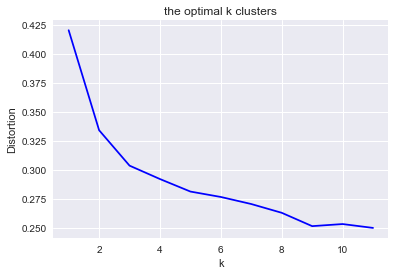

In [85]:
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(df_new)
    kmeanModel.fit(df_2)
    distortions.append(sum(np.min(cdist(df_2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_2.shape[0])

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('the optimal k clusters')
plt.show()

In [12]:
kmeanModel=KMeans(n_clusters=5, init='k-means++',n_init=10, max_iter=300,  random_state = 1)
kmeanModel=kmeanModel.fit(df_2)
kmeanModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [13]:
df_back['Cluster'] = kmeanModel.fit_predict(df_2[df_2.columns[:]])

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_back['device'] = df.iloc[:,0]

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_back.to_csv('clusters2.csv')

In [64]:
##Average duration for each cluster
x = df_back.groupby(by='Cluster', as_index=False).agg({'duration': np.mean})
x

Cluster      duration
0        0  32655.135408
1        1  79866.529851
2        2  20271.067995
3        3  10216.194697
4        4   3406.364470

In [65]:
##size of clusters
df_back.groupby(by='Cluster', as_index=False).agg({'device': pd.Series.nunique})

Cluster  device
0        0     263
1        1       9
2        2    1465
3        3    2399
4        4    2755

In [66]:
df_back['Cluster'].value_counts()

4    4796
3    4186
2    2309
0    1189
1     134
Name: Cluster, dtype: int64

In [ ]:
###weekday
##People in Cluster  don't come on weekends 

In [72]:
c = df_back1.groupby(by='Cluster', as_index=False).agg({'device': pd.Series.nunique})
c

Cluster  device
0        0      67
1        1       7
2        4      11

In [71]:
df_back1['Cluster'].value_counts()

0    198
1    125
4     18
Name: Cluster, dtype: int64

In [68]:
###No of employees
no_of_emp = (df_back['duration']>=21600) & (df_back['distinct_ap']<=4)

In [69]:
df_back1= df_back[no_of_emp]

In [70]:
df_back1.shape

(341, 56)

In [15]:
##Quick visitors # less than 30 minutes
quick = df_back['duration']<1800
df_quick = df_back[quick]
df_quick.groupby(by='Cluster', as_index=False).agg({'device': pd.Series.nunique})

Cluster  device
0        3     158
1        4    1773

In [18]:
df_quick.groupby(by='Cluster', as_index=False).agg({'device': pd.Series.nunique})

Cluster  device
0        3     158
1        4    1773

In [73]:
##Long duration visitors
long = df_back['duration']>=1800
df_long = df_back[long]
df_long.groupby(by='Cluster', as_index=False).agg({'device': pd.Series.nunique})

Cluster  device
0        0     263
1        1       9
2        2    1465
3        3    2321
4        4    1339

In [26]:
df_back['entry_hr'] = df["Hour"]
df_back['exit_hr'] = df["Exit_Hour"]

C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
pd.pivot_table(df_back,index=["entry_hr"],values=["device"],columns=["Cluster"],aggfunc=pd.Series.nunique,fill_value=0)

device                  
Cluster       0  1    2    3    4
entry_hr                         
00            0  0    0    9    8
01            0  0    1    1    5
02            0  0    0    2    1
03            0  0    0    0    3
04            8  8    7    6   10
05            9  1    4    1    6
06           11  2    5    7   18
07           32  1   17   23   31
08           43  0   38   36   52
09           61  1  112  101  114
10           76  2  268  225  213
11           59  3  238  257  244
12           52  2  224  370  389
13           40  1  254  432  442
14           33  1  186  364  370
15           34  1  150  365  367
16           19  0  140  367  388
17           12  0   98  310  356
18            2  0   78  277  350
19            2  0   46  199  260
20            1  0   13  110  198
21            1  0    4   27  104
22            0  0    3   11   49
23            0  0    5    9   16

In [76]:
pd.pivot_table(df_back,index=["exit_hr"],values=["device"],columns=["Cluster"],aggfunc=pd.Series.nunique,fill_value=0)

device                  
Cluster      0  1    2    3    4
exit_hr                         
00           9  1   17   21   18
01           4  2    6   12   13
02           4  3    6    3    8
03           8  8    6    7    7
04           0  0    0    0    4
05           0  0    0    2   10
06           0  0    0    4   14
07           0  0    3    3   26
08           0  0    6    7   37
09           0  0    5   13   67
10           0  0    7   28  141
11           3  0   20   80  189
12           3  0   34  133  274
13          15  0   72  204  407
14          19  0  120  333  402
15          28  0  148  357  390
16          52  0  203  362  382
17          60  0  219  405  367
18          60  1  231  384  347
19          45  1  216  355  311
20          60  3  191  331  250
21          66  2  245  292  221
22          69  3  107  125  106
23          22  0   35   39   23

In [77]:
#Count of people on different days
x = df.groupby(by='day_of_week', as_index=False).agg({'device': pd.Series.nunique})

In [78]:
x

day_of_week  device
0            1    1425
1            2    1026
2            3     739
3            4     762
4            5     794
5            6    1279
6            7    2333

In [176]:
df.groupby(by='weekend_flag', as_index=False).agg({'device': pd.Series.nunique})

weekend_flag  device
0             0    3093
1             1    3215

In [187]:
# Create two lists for the loop results to be placed
hour = []
# For each row in a varible,
for row in df['entry_time']:
    hour.append(row.split(' ')[1])

# Create 1 new column 
df['entry_time_hour'] =  hour
hour1 = []
# For each row in a varible,
for row in df['entry_time_hour']:
    hour1.append(row.split(':')[0])

# Create 1 new column 
df['entry_time_hour1'] =  hour1

In [209]:
c = df.groupby(by='entry_time_hour1', as_index=False).agg({'device': pd.Series.nunique})

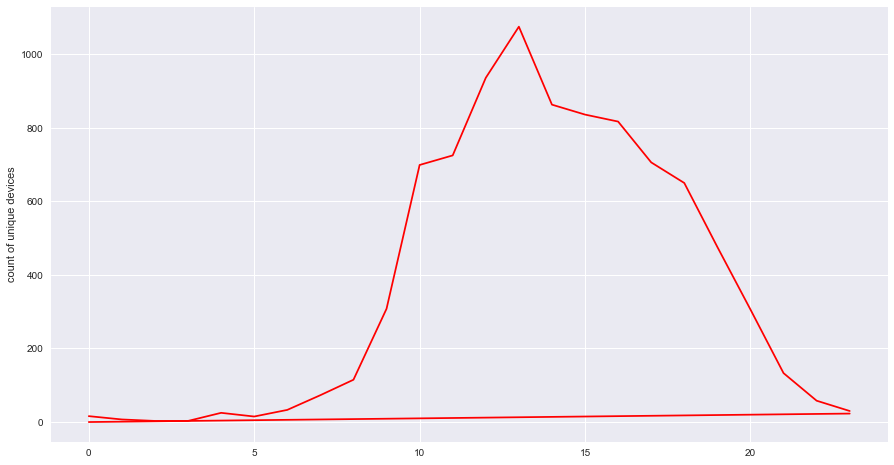

In [214]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,8))
plt.plot(c, color = "red")
plt.ylabel('count of unique devices')
plt.show()

In [217]:
pd.pivot_table(df,index=["day_of_week","entry_time_hour1"],values=["device"],aggfunc=pd.Series.nunique)

device
day_of_week entry_time_hour1        
1           00                     2
            04                     7
            05                     1
            06                     7
            07                    11
            08                    16
            09                    59
            10                   131
            11                   174
            12                   188
            13                   269
            14                   249
            15                   184
            16                   184
            17                   108
            18                    85
            19                    38
            20                    14
            21                     6
            22                     6
            23                     2
2           01                     1
            04                     8
            05                     4
            06                    11
            07                    19
            08                    35
            09                    50
            10                    93
            11                   107
...                              ...
6           15                   159
            16                   145
            17                   124
            18                   151
            19                   132
            20                    66
            21                    41
            22                    13
            23                     3
7           00                     1
            04                     5
            05                     3
            06                     5
            07                    22
            08                    49
            09                   105
            10                   261
            11                   233
            12                   341
            13                   360
            14                   256
            15                   266
            16                   317
            17                   217
            18                   204
            19                   128
            20                   107
            21                    24
            22                    12
            23                     7

[154 rows x 1 columns]

In [231]:
pd.pivot_table(df,index=["entry_time_hour1"],values=["time_0","time_1","time_2","time_3","time_4","time_0_1"],columns=["weekend_flag"],aggfunc=np.mean,fill_value=0)

time_0                   time_0_1             \
weekend_flag                 0             1            0          1   
entry_time_hour1                                                       
00                 1943.666667   4338.000000     0.000000   0.000000   
01                  774.571429      0.000000     0.000000   0.000000   
02                  275.333333      0.000000     0.000000   0.000000   
03                 1074.333333      0.000000     0.000000   0.000000   
04                51856.222749  71802.742857     1.156398   0.833333   
05                 5447.151515     80.875000  4817.818182   0.000000   
06                 8348.842105   1647.000000  1021.197368   0.000000   
07                 6208.517007   2714.859649    52.129252   0.000000   
08                15134.058065   8771.267717     8.569892   0.559055   
09                 5984.927835   1479.786364     0.000000  39.940909   
10                 1500.817996   1252.526316     7.664622   0.936404   
11                 1824.971717    751.394977     0.000000  11.098174   
12                 1484.294872    151.652705     0.000000   0.000000   
13                  713.769006    389.875923     0.000000   0.000000   
14                  794.281416    425.921201     0.000000   0.000000   
15                  578.145833    241.667368     0.000000   0.000000   
16                  728.437209    202.191806     0.000000   0.000000   
17                  364.902439    327.965418     0.000000   0.000000   
18                  530.902778    166.302326    24.577381   0.063123   
19                  414.855000    336.530726     0.772500   0.000000   
20                  149.531532    139.169231     0.000000   0.000000   
21                  382.007937   1482.540541     0.000000   0.000000   
22                  758.932203   2697.840000     0.000000   0.000000   
23                 1917.535714   2656.888889     0.000000   0.000000   

                       time_1                     time_2                \
weekend_flag                0             1            0             1   
entry_time_hour1                                                         
00                1023.266667    196.333333   313.266667    343.666667   
01                1720.000000      0.000000   986.571429      0.000000   
02                 131.666667      0.000000   832.000000      0.000000   
03                 111.666667      0.000000     0.000000      0.000000   
04                3386.900474    245.194444  3252.559242    391.472222   
05                4723.939394   3750.750000  2858.636364  15104.250000   
06                6359.381579  10552.937500  4501.881579   2993.437500   
07                8991.612245   8314.192982  4402.503401   6699.877193   
08                5306.206452   8180.000000  2042.548387   3820.220472   
09                6074.187629   8525.345455  3272.216495   3287.827273   
10                6555.535787   7578.850877  2292.468303   2768.440789   
11                4934.866397   6220.404110  2606.030303   3223.650685   
12                4255.470400   4629.668412  2338.969600   2348.874346   
13                4198.426901   4567.951256  1963.144737   1991.460857   
14                3718.844248   3811.821764  2034.952212   1813.005629   
15                3247.793043   2792.376842  1862.371528   1651.351579   
16                3871.610853   2910.204842  1882.415504   1477.208566   
17                2810.391986   2106.965418  1435.844948   1566.187320   
18                2086.557540   1896.614618  1277.636905    833.023333   
19                1584.905000   1703.586592   799.530000    795.586592   
20                1252.292793   1097.984615   586.782805    818.861538   
21                 974.230159   1108.459459   457.031746    931.081081   
22                 542.406780   1321.240000   440.372881    791.520000   
23                2396.892857   2104.777778  1269.785714    249.777778   

                       time_3                    time_4               
weekend_f

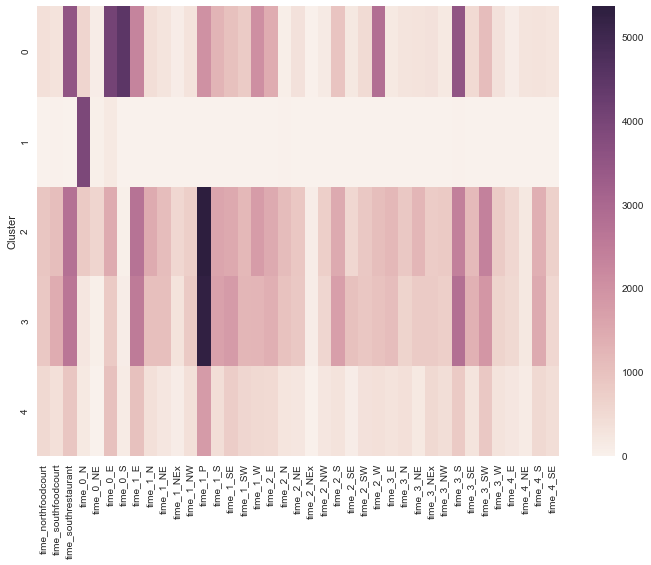

In [79]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time = df_back[["Cluster","time_northfoodcourt","time_southfoodcourt","time_southrestaurant","time_0_N","time_0_NE","time_0_E","time_0_S","time_1_E","time_1_N","time_1_NE","time_1_NEx","time_1_NW","time_1_P","time_1_S","time_1_SE","time_1_SW","time_1_W","time_2_E","time_2_N","time_2_NE","time_2_NEx","time_2_NW","time_2_S","time_2_SE","time_2_SW","time_2_W","time_3_E","time_3_N","time_3_NE","time_3_NEx","time_3_NW","time_3_S","time_3_SE","time_3_SW","time_3_W","time_4_E","time_4_NE","time_4_S","time_4_SE"]].groupby(["Cluster"]).sum()/1000
ax = sns.heatmap(time)

In [90]:
pd.pivot_table(df_back,index=["Cluster"],values=["duration"],columns=["day_of_week"],aggfunc=np.mean,fill_value=0)

duration                                            \
day_of_week             1             2             3             4   
Cluster                                                               
0            33352.740157  32836.403061  32731.359551  34695.109091   
1            81815.933333  81418.157895  81227.882353  80410.095238   
2            17962.370787  21141.855019  24069.895735  23188.229592   
3             9942.722944  10356.601961  10729.483627  10639.149606   
4             3225.064052   3446.979626   4014.756813   3554.893491   

                                                       
day_of_week             5             6             7  
Cluster                                                
0            32064.148936  31180.044944  32025.759804  
1            79721.640000  77315.263158  77578.555556  
2            21870.755981  18564.722714  19528.207133  
3            10262.456522   9898.113602  10168.628342  
4             3973.088652   3079.556604   3121.750000

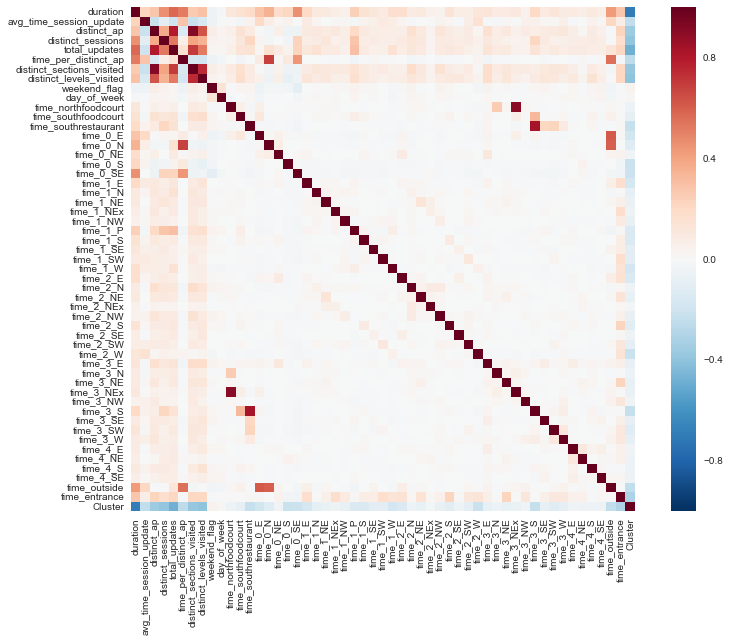

In [92]:
corr_r = df_back.corr()
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12.7, 9.27)
sns.heatmap(corr_r,square = True)

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time = df_back[["Cluster","time_northfoodcourt","time_southfoodcourt","time_southrestaurant","time_3_E","time_3_N","time_3_NE","time_3_NEx","time_3_NW","time_3_S","time_3_SE","time_3_SW","time_3_W","time_4_E","time_4_NE","time_4_S","time_4_SE"]].groupby(["Cluster"]).sum()/1000
ax = sns.heatmap(time)

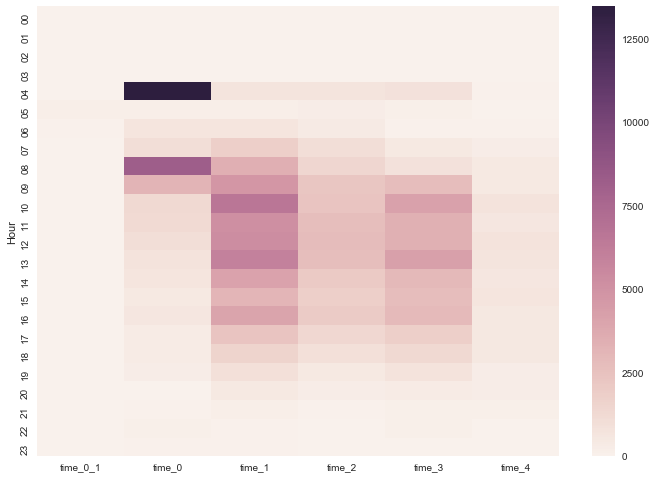

In [31]:
#%%
session = pd.read_csv("moa_analytics.csv")
session["Hour"] = session["entry_time"].str[11:13]
session["exit_Hour"] = session["exit_time"].str[11:13]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time = session[["Hour", "time_0_1","time_0", "time_1", "time_2", "time_3", "time_4"]]

time_by_hour = (time[["Hour", "time_0_1","time_0", "time_1", "time_2", "time_3", "time_4"]].groupby(["Hour"]).sum())/1000

ax = sns.heatmap(time_by_hour)


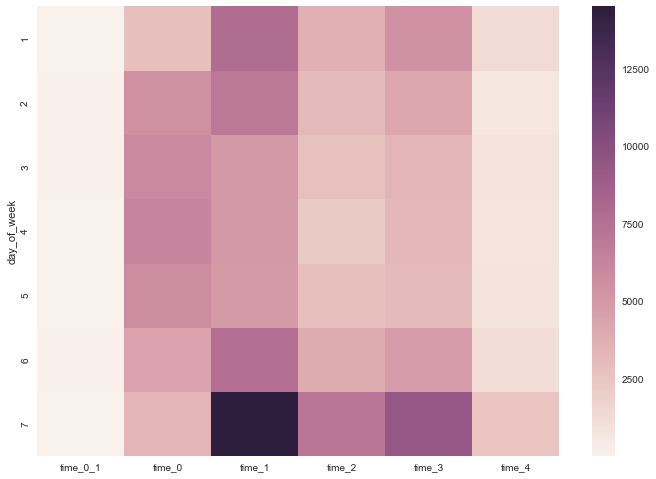

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
day_of_week = (session[["day_of_week","time_0_1", "time_0", "time_1", "time_2", "time_3", "time_4"]].groupby(["day_of_week"]).sum())/1000
ax = sns.heatmap(day_of_week)

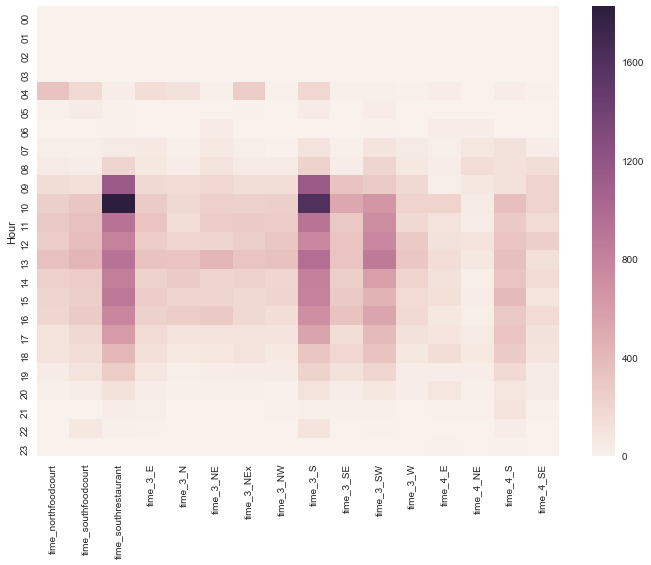

In [22]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time_by_hour = (session[["Hour","time_northfoodcourt","time_southfoodcourt","time_southrestaurant","time_3_E","time_3_N","time_3_NE","time_3_NEx","time_3_NW","time_3_S","time_3_SE","time_3_SW","time_3_W","time_4_E","time_4_NE","time_4_S","time_4_SE"]].groupby(["Hour"]).sum())/1000
ax = sns.heatmap(time_by_hour)

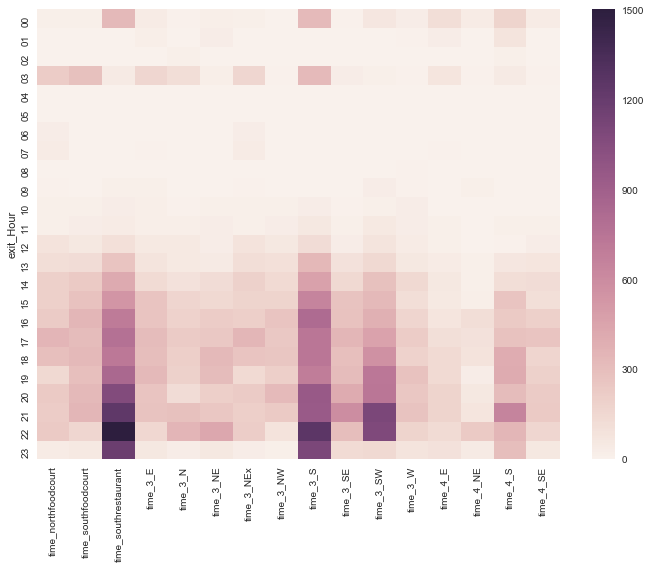

In [26]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time_by_hour = (session[["exit_Hour","time_northfoodcourt","time_southfoodcourt","time_southrestaurant","time_3_E","time_3_N","time_3_NE","time_3_NEx","time_3_NW","time_3_S","time_3_SE","time_3_SW","time_3_W","time_4_E","time_4_NE","time_4_S","time_4_SE"]].groupby(["exit_Hour"]).sum())/1000
ax = sns.heatmap(time_by_hour)

In [35]:
pd.pivot_table(df,index=["Hour"],values=[ "time_outside","time_entrance"],columns=["weekend_flag"],aggfunc=np.mean,fill_value=0)

time_entrance                time_outside              
weekend_flag             0             1             0             1
Hour                                                                
00              215.800000    189.666667   2061.933333   4487.666667
01              752.857143      0.000000   1637.428571      0.000000
02              526.000000      0.000000    163.333333      0.000000
03               75.666667      0.000000   1103.000000      0.000000
04             2274.393365    304.971429  18183.360190  29628.542857
05             1796.272727  10348.125000   9489.000000   5946.375000
06             3592.921053   5112.687500   8405.197368   1639.562500
07             2880.204082   3874.017544   2553.517007   2794.877193
08             1390.591398   2979.440945   1857.791398   3173.944882
09             2179.253608   2328.041096   2018.888660   2040.757991
10             2228.470348   2326.451754   1212.184049   1622.307018
11             2012.935223   1670.116438   1764.957490   1515.988584
12             1570.200321   1616.034904    931.509615    602.118674
13             1683.008772   1393.183161    784.339181    689.211226
14             1469.373451   1091.356473    831.272566    740.594747
15             1412.660870   1066.168421    728.805217    379.858947
16             1142.159690   1017.741155    650.801550    335.307263
17              918.642857    925.847262    521.139373    539.815562
18              878.261905    742.623333    572.880952    306.830000
19              628.422500    652.687151    368.407500    422.860335
20              478.511312    418.938462    342.538462    304.061538
21              412.317460    715.486486    434.626984    249.594595
22              454.966102    745.560000    177.355932    336.400000
23              881.035714    433.222222   1379.785714     60.666667

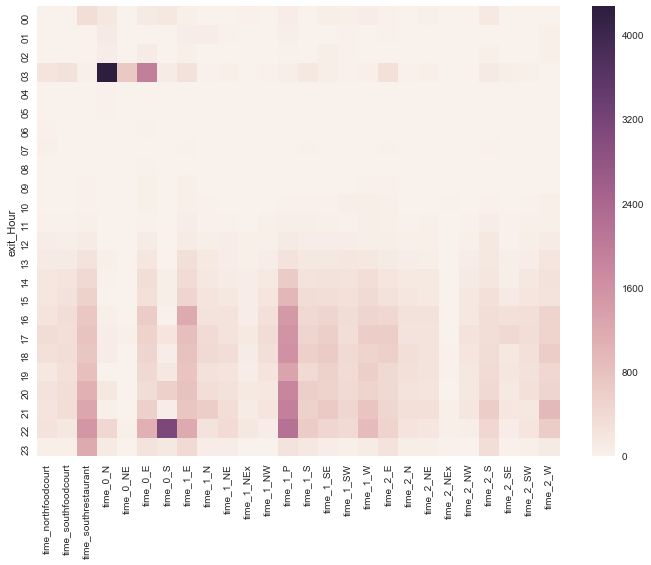

In [36]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time_by_hour = (session[["exit_Hour","time_northfoodcourt","time_southfoodcourt","time_southrestaurant","time_0_N","time_0_NE","time_0_E","time_0_S","time_1_E","time_1_N","time_1_NE","time_1_NEx","time_1_NW","time_1_P","time_1_S","time_1_SE","time_1_SW","time_1_W","time_2_E","time_2_N","time_2_NE","time_2_NEx","time_2_NW","time_2_S","time_2_SE","time_2_SW","time_2_W"]].groupby(["exit_Hour"]).sum())/1000
ax = sns.heatmap(time_by_hour)

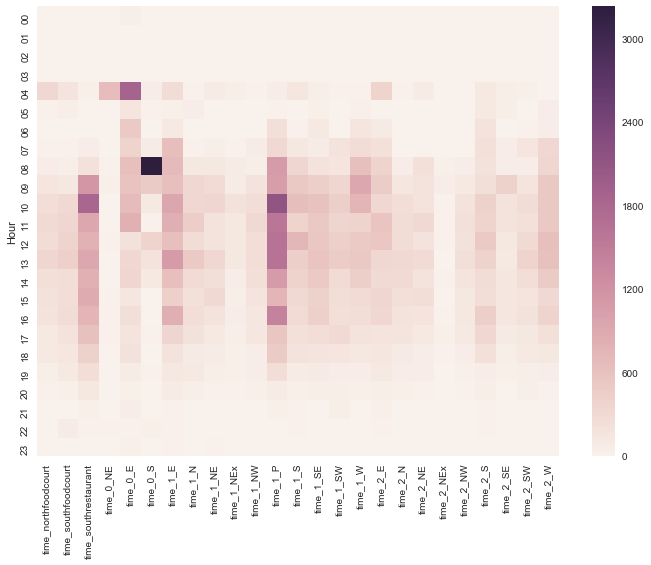

In [34]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
time_by_hour = (session[["Hour","time_northfoodcourt","time_southfoodcourt","time_southrestaurant","time_0_NE","time_0_E","time_0_S","time_1_E","time_1_N","time_1_NE","time_1_NEx","time_1_NW","time_1_P","time_1_S","time_1_SE","time_1_SW","time_1_W","time_2_E","time_2_N","time_2_NE","time_2_NEx","time_2_NW","time_2_S","time_2_SE","time_2_SW","time_2_W"]].groupby(["Hour"]).sum())/1000
ax = sns.heatmap(time_by_hour)